In [93]:
import import_ipynb
import datetime
import pandas
from numpy import nan
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import dates as mdate
from IPython.display import Image
#pandas.options.display.float_format = '{:,.3f}'.format

In [94]:
# CONSTANTS

MOISTURES_PROBES = ['MUX0','MUX1','MUX2','MUX3','MUX4','MUX5','MUX6','MUX7']
ROLLING_WINDOW = 30 # RUPTURE_LEVEL_THRESHOLD and PCT_CHANGE_PERIOD are affected by this value
LATEST_LEVEL_CHECK_WINDOW=30
LATEST_LEVEL_CHECK_QUANTILE=0.5
RUPTURE_LEVEL_THRESHOLD = 0.015
PCT_CHANGE_PERIOD = 10 # RUPTURE_LEVEL_THRESHOLD is affected by this value 

# UTILS

def plot(series): 
    plt.rcParams['figure.figsize'] = [15,7]
    plt.rcParams['timezone'] = 'America/Sao_Paulo'

    fig,ax = plt.subplots()
    x = mdate.epoch2num(series.index)
    fmt = mdate.DateFormatter('%y-%m-%d %H:%M')

    ax.xaxis.set_major_formatter(fmt)
    plt.xticks( rotation=25 )
    plt.plot_date(x, series, linestyle='solid', marker='None')
    plt.legend(MOISTURES_PROBES)
    plt.show()

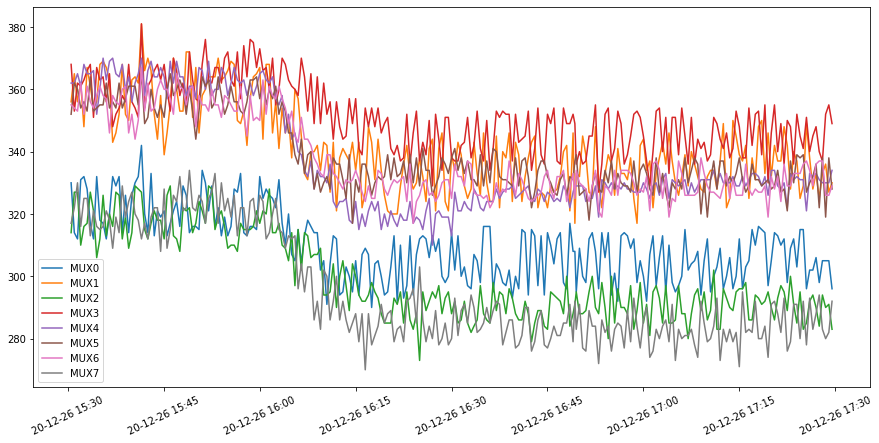

In [95]:
# RAW DATA FROM 2020-12-26 15:30 TO 2020-12-26 17:30
df = pandas.read_pickle('./detect_sudden_change_dataset.pkl')
plot(df)

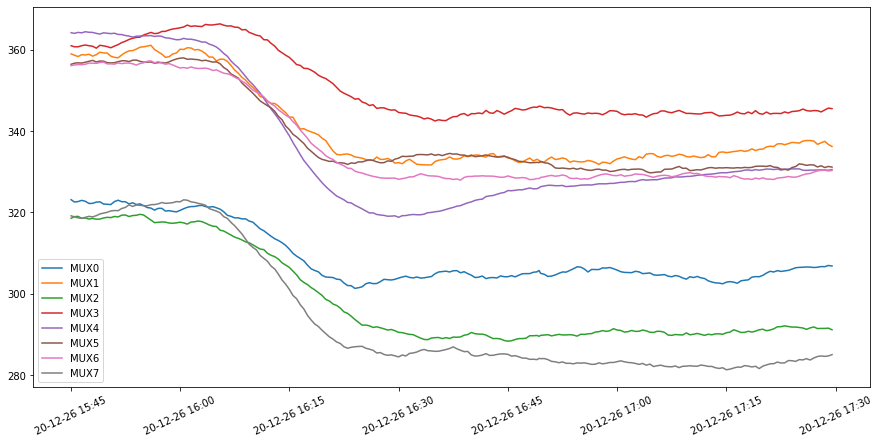

In [96]:
# Filtering the noise ...
dfr = df.rolling(ROLLING_WINDOW).mean().dropna()#.round(0).astype(int)
plot(dfr)

In [97]:
#MUX_PORT_THRESHOLD
OFFLINE=50
WET=350
NOSOIL=680

In [98]:
#get first moisture data filtered
print("FILTERED DATA:")
print(dfr[dfr.index == dfr.index[0]])
#get first moisture data NOT filtered
print("ROW DATA:")
print(df[df.index == df.index[0]])

FILTERED DATA:
             MUX0        MUX1        MUX2        MUX3        MUX4        MUX5  \
TIMESTAMP                                                                       
1609008303  323.1  358.933333  318.533333  360.933333  364.133333  356.366667   

                  MUX6        MUX7  
TIMESTAMP                           
1609008303  356.033333  319.133333  
ROW DATA:
            MUX0  MUX1  MUX2  MUX3  MUX4  MUX5  MUX6  MUX7
TIMESTAMP                                                 
1609007430   330   356   314   368   362   352   355   317


In [99]:
#get last moisture data filtered
print("FILTERED DATA:")
print(dfr.tail(1))
#get last moisture data NOT filtered
print("ROW DATA:")
print(df.tail(1))

FILTERED DATA:
             MUX0        MUX1        MUX2        MUX3   MUX4   MUX5  \
TIMESTAMP                                                             
1609014570  306.8  336.166667  291.133333  345.466667  330.5  331.1   

                  MUX6        MUX7  
TIMESTAMP                           
1609014570  330.266667  285.033333  
ROW DATA:
            MUX0  MUX1  MUX2  MUX3  MUX4  MUX5  MUX6  MUX7
TIMESTAMP                                                 
1609014570   296   330   283   349   334   328   329   292


In [100]:
#get last moisture data filtered
dfr.tail(LATEST_LEVEL_WINDOW).describe()

,MUX0,MUX1,MUX2,MUX3,MUX4,MUX5,MUX6,MUX7
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,305.160000,336.254444,291.271111,344.617778,330.377778,331.155556,328.897778,283.055556
std,1.447217,0.971923,0.498637,0.458695,0.243117,0.349749,0.753532,1.091778
min,302.566667,334.666667,290.400000,343.833333,329.700000,330.366667,328.066667,281.300000
25%,304.091667,335.266667,290.850000,344.266667,330.333333,330.966667,328.375000,282.175000
50%,305.550000,336.416667,291.316667,344.633333,330.400000,331.100000,328.633333,282.983333
75%,306.491667,337.050000,291.675000,344.966667,330.550000,331.333333,329.375000,283.783333
max,306.933333,337.633333,292.100000,345.600000,330.666667,331.900000,330.333333,285.033333


In [101]:
df.tail(LATEST_LEVEL_WINDOW).describe()

,MUX0,MUX1,MUX2,MUX3,MUX4,MUX5,MUX6,MUX7
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,306.800000,336.166667,291.133333,345.466667,330.500000,331.100000,330.266667,285.033333
std,6.681937,7.479090,4.666338,6.926876,3.104502,5.364957,4.593349,6.599286
min,296.000000,325.000000,283.000000,330.000000,321.000000,319.000000,319.000000,271.000000
25%,302.250000,330.250000,286.750000,340.000000,329.250000,328.000000,327.000000,280.000000
50%,305.500000,337.000000,291.500000,347.000000,331.000000,330.500000,329.000000,283.000000
75%,312.750000,341.500000,294.750000,351.750000,332.750000,336.000000,333.750000,291.750000
max,316.000000,350.000000,300.000000,355.000000,334.000000,339.000000,337.000000,295.000000


In [103]:
latest_level = df.tail(LATEST_LEVEL_CHECK_WINDOW).quantile(LATEST_LEVEL_CHECK_QUANTILE).round(0).astype(int)

In [107]:
latest_level

MUX0    306
MUX1    337
MUX2    292
MUX3    347
MUX4    331
MUX5    330
MUX6    329
MUX7    283
Name: 0.5, dtype: int64